# Data Visualization
let's practice what we have learned so far and visualize some data!

In order to validate this checkpoint you are asked to accomplish the following tasks:

Preprocessing phase.
After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.

As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.

Verify that your data is ready to be treated.

2. Visualization phase:

Let’s begin now with the data visualization phase: 

Start by studying the distribution of the most important features based on your understanding of the dataset and the problem.

Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.

Pick two other features and study their impact on the survival of the individuals.

Have a look at this function:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

Try running the function, analyze what it does exactly and its utilities and finally, write a paragraph describing your analysis (the paragraph should be in English).

Use the groupby function combined with the mean() to view the relation between Pclass and survived 

As a final step try to drop the useless columns such as Names

In fact, we dropped the column Names because we evaluated it to be useless. Well that's not the case because we can create a very useful feature from the names.

Your task now is to create a new column called Title which contains the appropriate Title for each individual ( hint: extract the title from the column Names)

Visualize the correlation between Title and other features(e.g Sex, Fare, Age...)

As you have seen, there are a lot of titles which make the feature very impractical, let's try to group these titles into more useful ones.

hint: use the following dictionary

Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer”,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty"

                  "the Countess": "Royalty",

                    "Dona":       "Royalty”,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs

                    "Master" :    "Master"

                    }

let's visualize the same correlations using these new titles now.

Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

Use what you have learned so far to conclude if this feature is useful or not.

In [186]:
# Preprocessing phase.
import pandas as pd
Titanic = pd.read_csv("titanic-passengers.csv",sep =";")
# Head of the Dataset
Titanic.head()
#Titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [187]:
# Some General Infos
Titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [188]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [189]:
# Finding the Missing Values
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [190]:
Titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [191]:
# Replace Missing Values


# Number of Age that will be replaced are 177 from 891--> replace
# Replace Missing Age Values with mean() 

print("Age.mean : ",Titanic.Age.mean(),"\nAge.median : ",Titanic.Age.median(),"\nAge.mode : ",Titanic.Age.mode())

Age.mean :  29.69911764705882 
Age.median :  28.0 
Age.mode :  0    24.0
dtype: float64


In [192]:
Titanic.Age.fillna(Titanic.Age.mean(), inplace = True )

In [193]:
Titanic.Age.isnull().sum()

0

In [194]:
# Cabin
#  687 Missing Values from 891  Lohnt sich überhaupt zu ersetzten ??
Titanic.Cabin.isnull().sum()

687

In [195]:
Titanic.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [196]:
# --> delate Cabin, because we don't have enough Data
Titanic.drop(["Cabin"],axis = 1 ,inplace = True)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [197]:
# Embarked
# 2 Missing Value from 891 
# Replace Embarked Missing Value with the most frequent value 
Titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [199]:
Titanic.Embarked.fillna("S", inplace =True)

In [200]:
Titanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [201]:
Titanic.Embarked.isnull().sum()

0

In [202]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [81]:
# Visualization phase:
#Start by studying the distribution of the most important features based on your understanding of the dataset and the problem.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

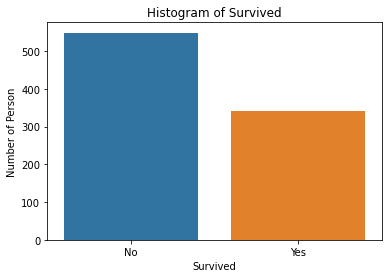

In [203]:
# Survived
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.countplot(x = "Survived", data = Titanic)
plt.xlabel("Survived")
plt.ylabel("Number of Person")
plt.title("Histogram of Survived")
plt.xticks( rotation = 0 ) 

Text(3.674999999999997, 0.5, 'Number of Person')

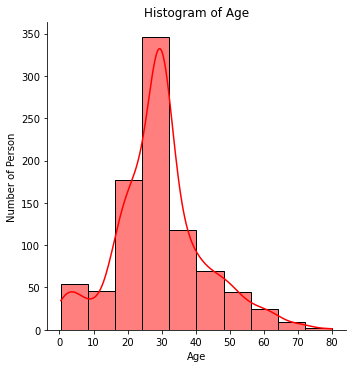

In [204]:
#  Titanic.Age.plot.hist()
sns.displot(Titanic.Age,bins =10 , kde = True, color = "Red")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Number of Person")

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

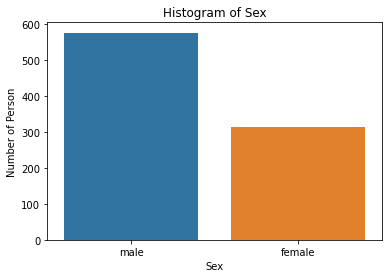

In [208]:
sns.countplot(x = "Sex", data = Titanic)
plt.xlabel("Sex")
plt.ylabel("Number of Person")
plt.title("Histogram of Sex")
plt.xticks( rotation = 0 ) 

Text(3.674999999999997, 0.5, 'Number of Person')

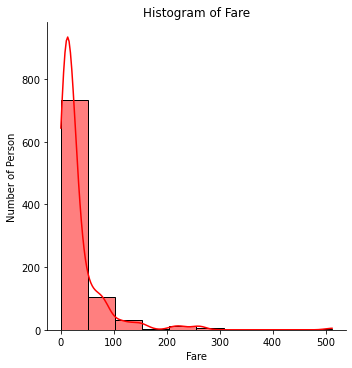

In [209]:
sns.displot(Titanic.Fare,bins =10 , kde = True, color = "Red")
plt.title("Histogram of Fare")
plt.xlabel("Fare")
plt.ylabel("Number of Person")

Text(3.674999999999997, 0.5, 'Number of Person')

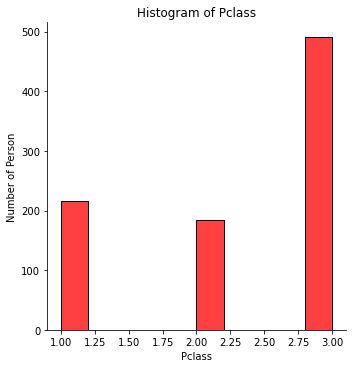

In [206]:
sns.displot(Titanic.Pclass,bins =10 , color = "Red")
plt.title("Histogram of Pclass")
plt.xlabel("Pclass")
plt.ylabel("Number of Person")

Text(3.674999999999997, 0.5, 'Number of Person')

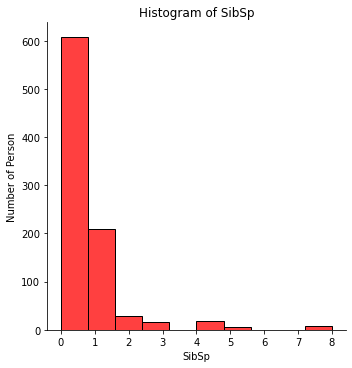

In [210]:
sns.displot(Titanic.SibSp,bins =10 , color = "Red")
plt.title("Histogram of SibSp")
plt.xlabel("SibSp")
plt.ylabel("Number of Person")

Text(3.674999999999997, 0.5, 'Number of Person')

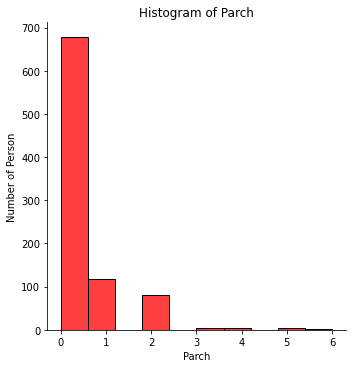

In [211]:
sns.displot(Titanic.Parch,bins =10 , color = "Red")
plt.title("Histogram of Parch")
plt.xlabel("Parch")
plt.ylabel("Number of Person")

(array([0, 1, 2]), [Text(0, 0, 'S'), Text(1, 0, 'C'), Text(2, 0, 'Q')])

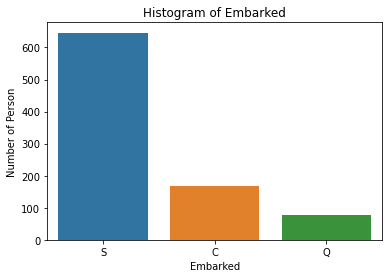

In [212]:
sns.countplot(x = "Embarked", data = Titanic)
plt.xlabel("Embarked")
plt.ylabel("Number of Person")
plt.title("Histogram of Embarked")
plt.xticks( rotation = 0 ) 

In [213]:
#Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.

Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


<AxesSubplot:>

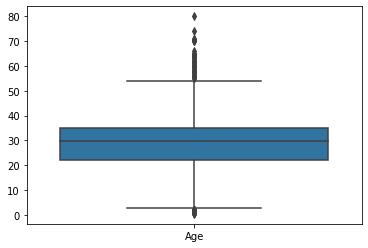

In [214]:
New_data = Titanic.drop(["PassengerId","Survived" ,"Pclass", "Name", "SibSp", "Parch", "Ticket", "Fare", "Embarked"], axis = 1)
sns.boxplot(data = New_data)

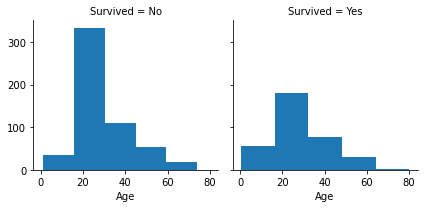

In [215]:
# Survived VS Age
g = sns.FacetGrid(Titanic, col='Survived')
g.map(plt.hist,"Age",bins=5)

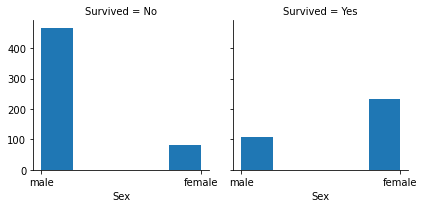

In [217]:
# Survived VS Sex
g = sns.FacetGrid(Titanic, col='Survived')
g.map(plt.hist,"Sex",bins=5)

C:\Users\Abderrahmen Mansour\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


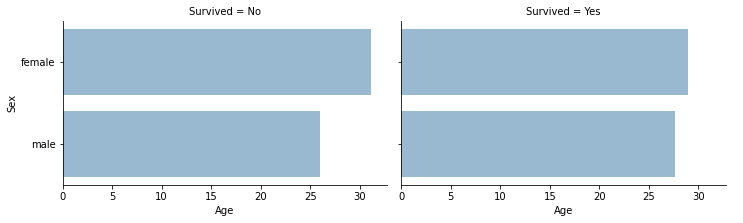

In [218]:
grid = sns.FacetGrid(Titanic, col = "Survived", height = 3.2, aspect =1.6)
grid.map(sns.barplot,"Age","Sex", alpha =.5,ci = None)
grid.add_legend()


C:\Users\Abderrahmen Mansour\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


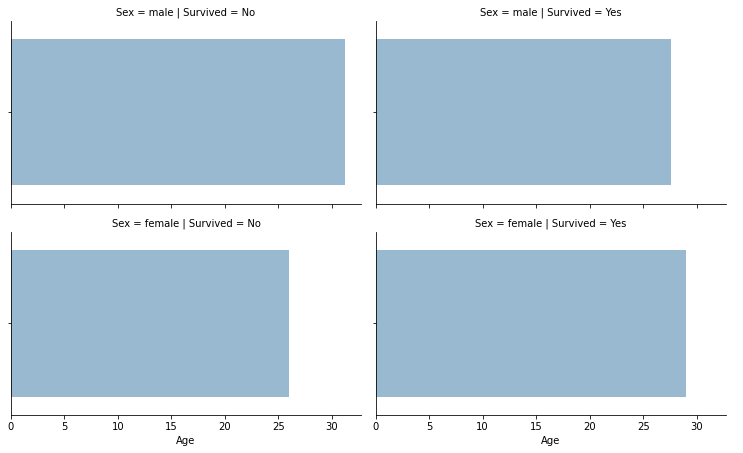

In [219]:
grid = sns.FacetGrid(Titanic,row = "Sex" ,col = "Survived", height = 3.2, aspect =1.6)

grid.map(sns.barplot,"Age", alpha =.5,ci = None)
grid.add_legend()


C:\Users\Abderrahmen Mansour\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


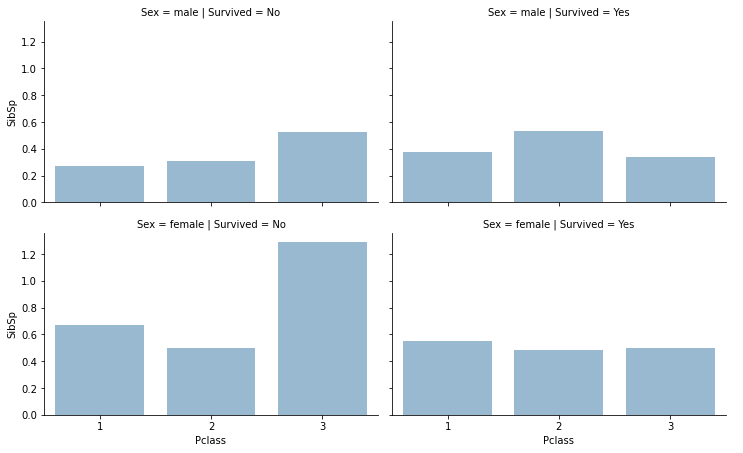

In [151]:
grid = sns.FacetGrid(Titanic,row = "Sex" ,col = "Survived", height = 3.2, aspect =1.6)

grid.map(sns.barplot,"Pclass","SibSp", alpha =.5,ci = None)
grid.add_legend()


C:\Users\Abderrahmen Mansour\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


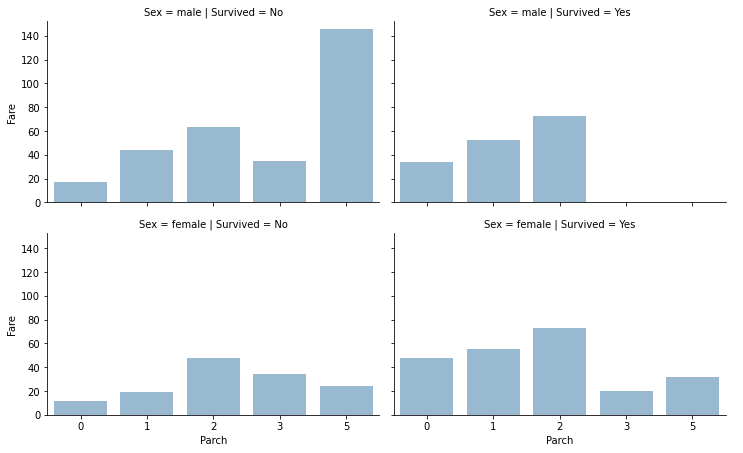

In [220]:
grid = sns.FacetGrid(Titanic,row = "Sex" ,col = "Survived", height = 3.2, aspect =1.6)

grid.map(sns.barplot,"Parch","Fare", alpha =.5,ci = None)
grid.add_legend()


In [221]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

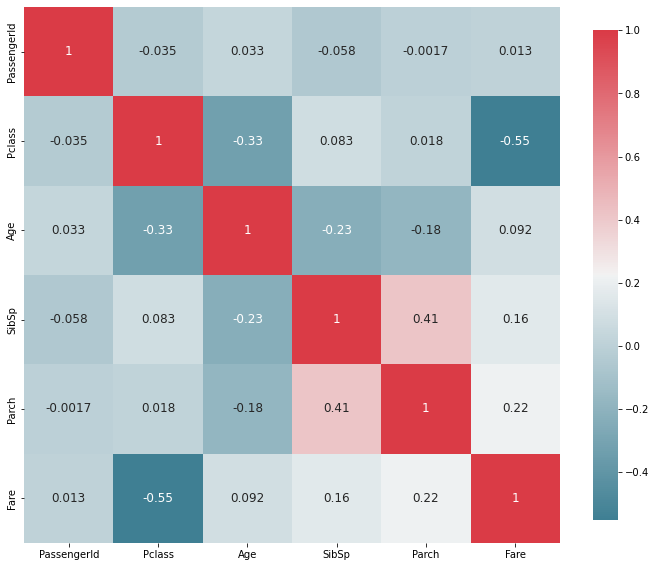

In [156]:
plot_correlation_map(Titanic)

# describtion
PassengerId is a neutral Colleration --> not important

Psclass and Fare have a Negative Colleration, same between Pcclass and Age

SipSp and Parch have a Positive Colleration



# Use the groupby function combined with the mean() to view the relation between Pclass and survived 

In [222]:
Titanic.Survived.value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

In [223]:
Titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [224]:
cleanup={"Survived":{"Yes":1, "No": 0}}  # at first, let's convert Promoted to numerical format
Titanic.replace(cleanup, inplace=True)

In [225]:
Titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [175]:
Titanic[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [226]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


C:\Users\Abderrahmen Mansour\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


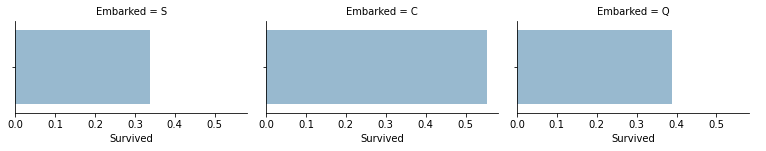

In [227]:
# Survieved vs embarked
grid = sns.FacetGrid(Titanic, col="Embarked", height=2.2, aspect=1.6)
grid.map(sns.barplot, "Survived", alpha=.5, ci=None)
grid.add_legend()

C:\Users\Abderrahmen Mansour\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


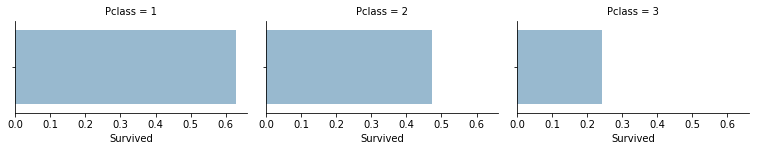

In [185]:
# Survieved vs Pclass
grid = sns.FacetGrid(Titanic, col="Pclass", height=2.2, aspect=1.6)
grid.map(sns.barplot, "Survived", alpha=.5, ci=None)
grid.add_legend()

In [228]:

Tianic1 =Titanic.drop(["Name","PassengerId", "Ticket"],axis = 1 )

In [230]:
Tianic1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,28.0,0,0,13.0000,S
1,0,3,male,25.0,0,0,7.6500,S
2,0,3,male,20.0,0,0,7.8542,S
3,0,3,female,29.0,0,4,21.0750,S
4,0,1,male,31.0,1,0,52.0000,S


In [368]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [369]:
Dicto = {"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty","Don":"Royalty","Sir":"Royalty","Lady" :"Royalty","the Countess": "Royalty","Dona": "Royalty","Mme":"Miss","Mlle":"Miss","Miss" :"Miss","Ms":"Mrs","Mr" : "Mrs","Mrs" :"Mrs","Master" :"Master"}
Dicto

{'Capt': 'Officer',
 'Col': 'Officer',
 'Major': 'Officer',
 'Dr': 'Officer',
 'Rev': 'Officer',
 'Jonkheer': 'Royalty',
 'Don': 'Royalty',
 'Sir': 'Royalty',
 'Lady': 'Royalty',
 'the Countess': 'Royalty',
 'Dona': 'Royalty',
 'Mme': 'Miss',
 'Mlle': 'Miss',
 'Miss': 'Miss',
 'Ms': 'Mrs',
 'Mr': 'Mrs',
 'Mrs': 'Mrs',
 'Master': 'Master'}

In [370]:
# Split ,
T1 = Titanic.Name.str.split(', ', expand=True)
T1

,0,1
0,Collander,Mr. Erik Gustaf
1,Moen,Mr. Sigurd Hansen
2,Jensen,Mr. Hans Peder
3,Palsson,Mrs. Nils (Alma Cornelia Berglund)
4,Davidson,Mr. Thornton
...,...,...
886,Nasser,Mrs. Nicholas (Adele Achem)
887,Sirayanian,Mr. Orsen
888,Cacic,Miss. Marija
889,Petroff,"Mr. Pastcho (""Pentcho"")"


In [371]:
# split .
T2 =T1[1].str.split('.', expand=True)
T2

,0,1,2
0,Mr,Erik Gustaf,None
1,Mr,Sigurd Hansen,None
2,Mr,Hans Peder,None
3,Mrs,Nils (Alma Cornelia Berglund),None
4,Mr,Thornton,None
...,...,...,...
886,Mrs,Nicholas (Adele Achem),None
887,Mr,Orsen,None
888,Miss,Marija,None
889,Mr,"Pastcho (""Pentcho"")",None


In [375]:
Titanic['Title'] = T2[0]
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr


In [376]:
Dicto2 = {'Title':Dicto}
print(Dicto2)

{'Title': {'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Dr': 'Officer', 'Rev': 'Officer', 'Jonkheer': 'Royalty', 'Don': 'Royalty', 'Sir': 'Royalty', 'Lady': 'Royalty', 'the Countess': 'Royalty', 'Dona': 'Royalty', 'Mme': 'Miss', 'Mlle': 'Miss', 'Miss': 'Miss', 'Ms': 'Mrs', 'Mr': 'Mrs', 'Mrs': 'Mrs', 'Master': 'Master'}}


In [380]:
Titanic.replace(Dicto2,inplace =True)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mrs


In [382]:
Titanic.Title.value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

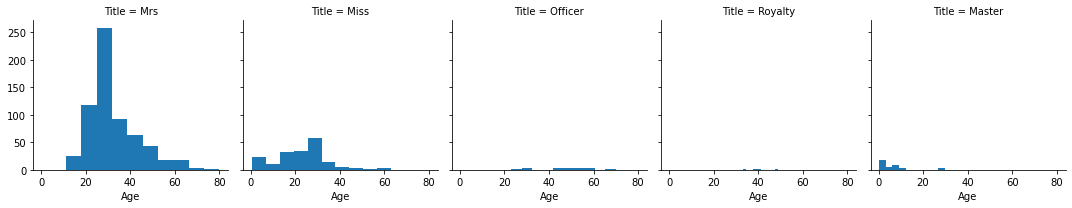

In [387]:
# Visualize the correlation between Title and other features(e.g Sex, Fare, Age...)
# Title Vs Survived 
g = sns.FacetGrid(Titanic, col='Title')
g.map(plt.hist,"Age",bins=10)



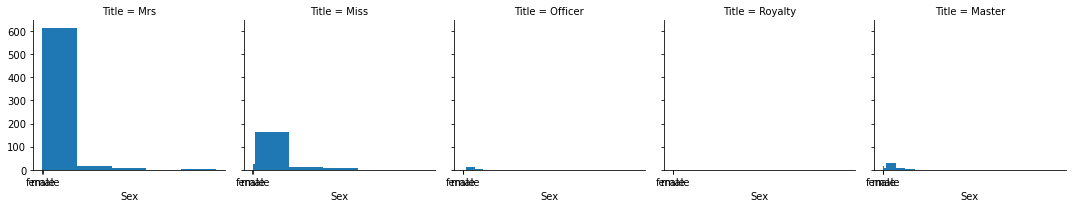

In [395]:
g.map(plt.hist,"Sex",bins=5)

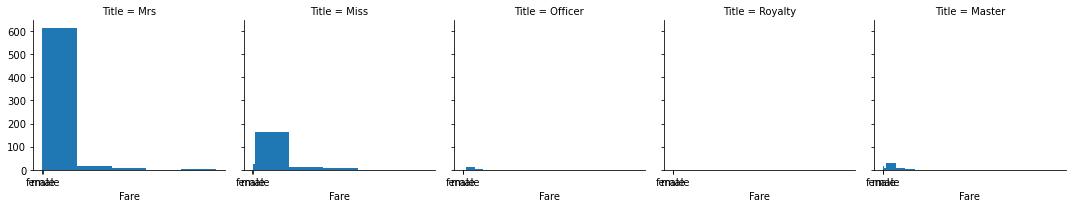

In [396]:
g.map(plt.hist,"Fare",bins=5)

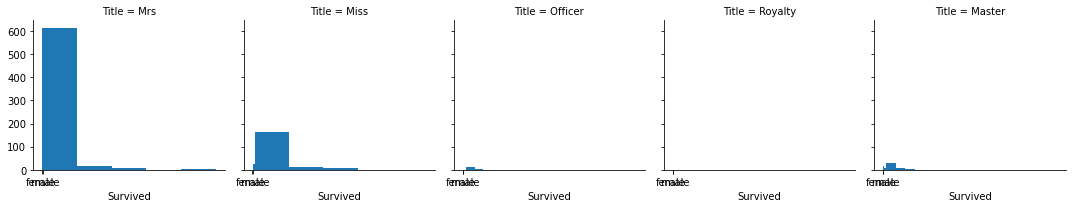

In [397]:
g.map(plt.hist,"Survived",bins=5)

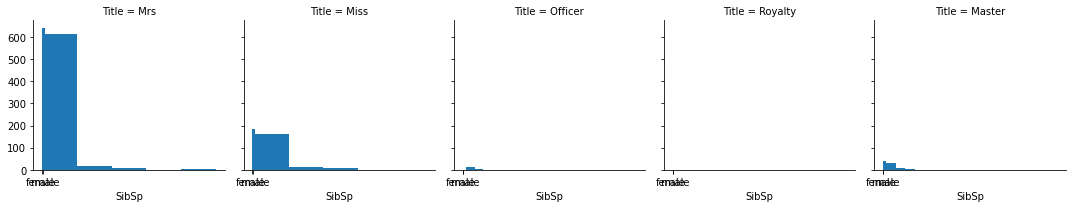

In [400]:
g.map(plt.hist,"SibSp",bins=1)

In [401]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mrs


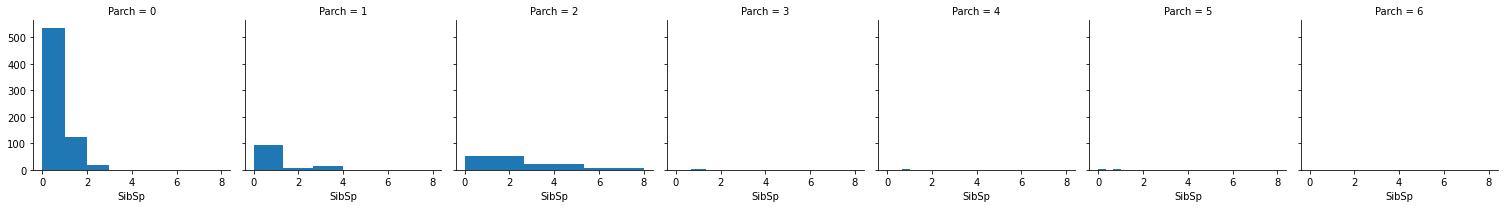

In [405]:
# sibsp	# of siblings / spouses aboard the Titanic	
# parch	# of parents / children aboard the Titanic

g = sns.FacetGrid(Titanic, col='Parch')
g.map(plt.hist,"SibSp",bins=3)


In [406]:
Titanic.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [407]:
Titanic.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

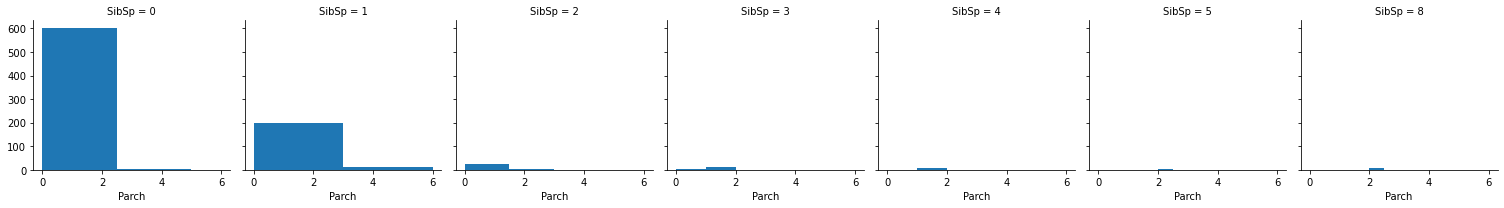

In [412]:
g = sns.FacetGrid(Titanic, col='SibSp')
g.map(plt.hist,"Parch",bins=2)


In [413]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mrs


In [414]:
New_data = Titanic.drop(["PassengerId","Survived", "Pclass","Name", "Sex","Age","Fare","Ticket","Title","Embarked"], axis =1)
New_data

,SibSp,Parch
0,0,0
1,0,0
2,0,0
3,0,4
4,1,0
...,...,...
886,1,0
887,0,0
888,0,0
889,0,0


<AxesSubplot:>

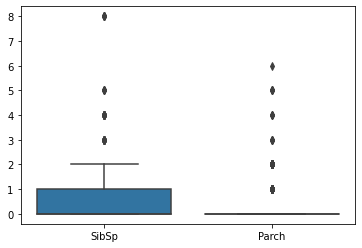

In [415]:
sns.boxplot(data = New_data)

<AxesSubplot:>

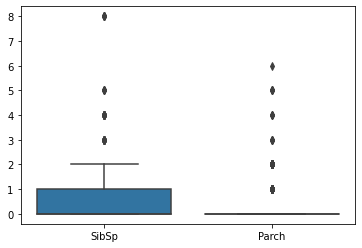

In [418]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()


scaler.fit_transform(pd.DataFrame(New_data.SibSp.values))
scaler.fit_transform(pd.DataFrame(New_data.Parch.values))

sns.boxplot(data = New_data)